[1.00000000e+00 6.68471074e-10 9.67644115e-13 2.13823997e-14]
Paramètres ajustés : A = 1.00e+34, gamma = -1.667


/tmp/ipykernel_8476/4090626189.py:28: RuntimeWarning: overflow encountered in power
  return A * x**gamma
/tmp/ipykernel_8476/4090626189.py:28: RuntimeWarning: overflow encountered in multiply
  return A * x**gamma


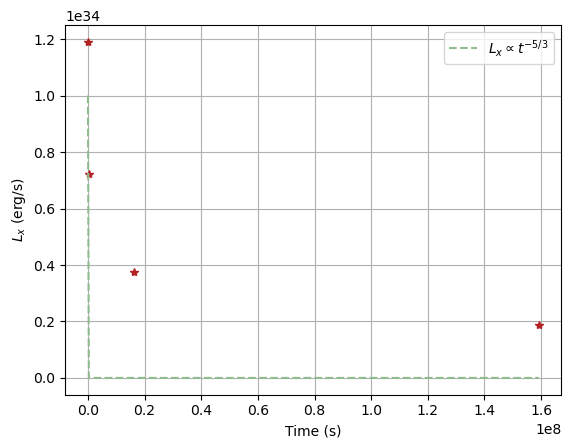

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from datetime import datetime

# Date de début d'observation :
date0 = datetime(2019, 8, 14, 10, 7, 15) # Temps de référence : 2019-08-14 10:07:15
date1 = datetime(2019, 8, 18, 2, 58, 7) # 2019-08-18 02:58:07
date2 = datetime(2020, 2, 17, 12, 20, 44) # 2020-02-17 12:20:44
date3 = datetime(2024, 8, 30, 2, 41, 31) # 2024-08-30 02:41:31

delta01 = date1 - date0
delta02 = date2 - date0
delta03 = date3 - date0

t1 = delta01.total_seconds() # secondes
t2 = delta02.total_seconds() # secondes
t3 = delta03.total_seconds() # secondes

Time = np.array([1, t1+1, t2+1, t3+1])  
Lx = np.array([1.19e34, 7.21e33, 3.76e33, 1.88e+33])  # Lx en erg/s

Lx_tde = Time**(-5/3)

print(Lx_tde)

def powerlaw(x, A, gamma): # y = A*x^gamma 
    return A * x**gamma

# Ajustement
params, covariance = curve_fit(powerlaw, Time, Lx, p0=[1e34, -5/3])
A_fit, gamma_fit = params

# Courbe ajustée
Lx_fit = powerlaw(Time, A_fit, gamma_fit)

print(f"Paramètres ajustés : A = {A_fit:.2e}, gamma = {gamma_fit:.3f}")

# Tracé
plt.figure()
plt.plot(Time, Lx, '*',color='firebrick')
plt.plot(Time, Lx_fit, '--', label=r'$L_x \propto t^{-5/3}$', color='darkseagreen')
plt.xlabel('Time (s)')
plt.ylabel('$L_x$ (erg/s)')
plt.legend()
plt.grid(True)
plt.show()